## [H重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## H

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

### Random Forest x Boston 效果比Decision Tree 好很多 50%

#### RandomForestRegressor(n_estimators=30, max_depth=8) 降很多
> MSE = 13.2

In [15]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
boston_housing = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston_housing.data, boston_housing.target, test_size=0.25, random_state=4)

# 建立模型 (使用 20 顆樹，每棵樹的最大深度為 4)
rlf = RandomForestRegressor(n_estimators=20, max_depth=4)
rlf.fit(x_train, y_train)
y_pred = rlf.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print("Baseline MSE: ", mse)

Baseline MSE:  18.44184573878876


In [7]:
n_estimators =[20,40,60,80,100]
mse = []
for e in n_estimators :
    rlf = RandomForestRegressor(n_estimators=e, max_depth=4)
    rlf.fit(x_train, y_train)
    y_pred = rlf.predict(x_test)
    mse.append(metrics.mean_squared_error(y_test, y_pred))

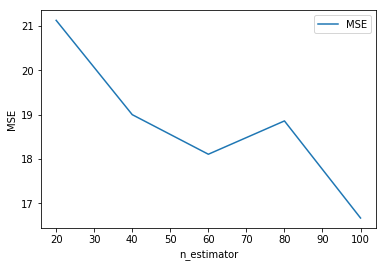

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 將結果繪圖
plt.plot((np.array(n_estimators)),
         mse, label="MSE")

plt.ylabel("MSE")
plt.xlabel("n_estimator")
plt.legend()


In [11]:
max_depth =[2,4,6,8,10]
mse = []
for m in max_depth :
    rlf = RandomForestRegressor(n_estimators=30, max_depth=m)
    rlf.fit(x_train, y_train)
    y_pred = rlf.predict(x_test)
    mse.append(metrics.mean_squared_error(y_test, y_pred))

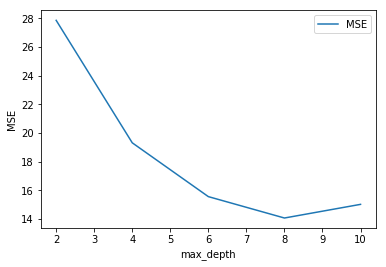

In [12]:
# 將結果繪圖
plt.plot((np.array(max_depth)),
         mse, label="MSE")

plt.ylabel("MSE")
plt.xlabel("max_depth")
plt.legend()


In [19]:
rlf = RandomForestRegressor(n_estimators=30, max_depth=8)
rlf.fit(x_train, y_train)
y_pred = rlf.predict(x_test)
print(metrics.mean_squared_error(y_test, y_pred))

14.321183492394749


### Decision Tree x Boston
> MSE=27.9

In [21]:
from sklearn.tree import DecisionTreeRegressor

drg = DecisionTreeRegressor()
drg.fit(x_train, y_train)
y_pred = drg.predict(x_test)

dmse = metrics.mean_squared_error(y_test, y_pred)
print("DT MSE: ", dmse)

DT MSE:  27.917165354330713
